In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

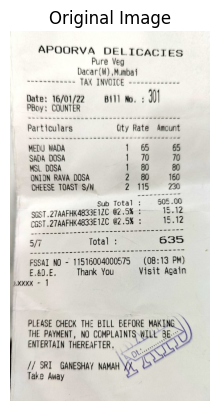

In [8]:
image_path = "data/receipts/bill1.jpg"

img = cv2.imread(image_path)
if img is None:
    raise ValueError("Image not found!")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()


Image brightness is fine


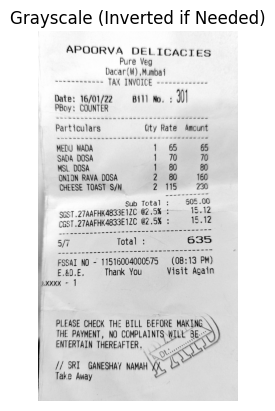

In [ ]:
def is_dark(gray_img, threshold=100):
    """Check if the image is mostly dark (needs inversion)."""
    return np.mean(gray_img) < threshold

# Invert if dark
if is_dark(gray):
    print("Image is dark — inverting")
    gray = cv2.bitwise_not(gray)
else:
    print("Image brightness is fine")

# Show grayscale (possibly inverted)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale (Inverted if Needed)")
plt.axis("off")
plt.show()

Brightness: 211.09
Using GLOBAL Thresholding


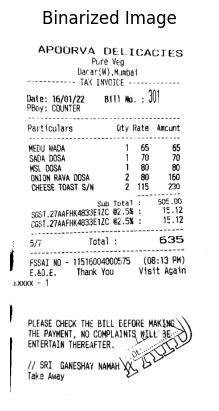

In [10]:
def auto_binarize(gray_img):
    """Decide between global and adaptive thresholding."""
    brightness = np.mean(gray_img)
    print(f"Brightness: {brightness:.2f}")

    if brightness > 180:
        print("Using GLOBAL Thresholding")
        _, bin_img = cv2.threshold(gray_img, 150, 255, cv2.THRESH_BINARY)
    else:
        print("Using ADAPTIVE Thresholding")
        bin_img = cv2.adaptiveThreshold(
            gray_img, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 15, 10
        )
    return bin_img

binary_img = auto_binarize(gray)

plt.imshow(binary_img, cmap="gray")
plt.title("Binarized Image")
plt.axis("off")
plt.show()


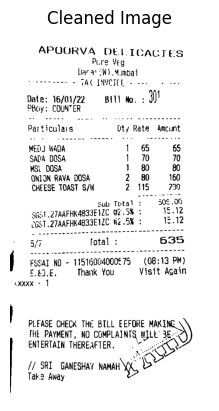

In [11]:
def clean_noise(img):
    """Apply light morphological noise removal."""
    kernel = np.ones((2, 2), np.uint8)
    cleaned = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    return cleaned

cleaned_img = clean_noise(binary_img)

plt.imshow(cleaned_img, cmap="gray")
plt.title("Cleaned Image")
plt.axis("off")
plt.show()


In [12]:
cv2.imwrite("data/preprocessed/final_processed_bill1.jpg", cleaned_img)

True

In [1]:
import cv2
import easyocr

# Load the cleaned image (you already saved it earlier)
image_path = 'data/preprocessed/final_processed_bill1.jpg'
cleaned_img = cv2.imread(image_path)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Run OCR on the image
result = reader.readtext(image_path, detail=0)

# Clean text (remove empty lines and extra whitespace)
cleaned_lines = [line.strip() for line in result if line.strip()]

# Display cleaned lines
for line in cleaned_lines:
    print(line)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

c:\Users\arshi\OneDrive\Desktop\Arshia_New\Arshia_Github\SplitSmart\.vnev\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


APUUJRVA
[DEI.ICACIES
Pure
Liar 4' ; H) , M.ba i
7A{ INVCTcE
HJal e
16/01/22
Bill
Ko_
31
PRCiy
COUN" ER
Par t iculais
(t/ Rate
4mcunt
MEDJ WADA
SAIA   DCSA
OSZ JROSAVA DOSA
2
W
CHFESE   TOAST  S/W
Sub
Tota)
502
S6ST.Z7AAFHK4833E1ZC @.58
19 _
LTST
Z7AAFHKA833E1ZC @2 .5x
1E.12
51
[ota]
635
FSSAI NO
115160Q40005 75
(08:13 PM)
E,@.E,
Thank You
Visit Acain
1XXXX
PLEASE CHECK THI BILL EEFORE MAKING
THL  PAYMENT ,
No COMPLAINTS WILE'
ENT ERTAIN THEREAFTER ,
11 SRI
GANESHAY  NAMAH
Take Away
Veg
i2
"24D


In [4]:
from paddleocr import PaddleOCR
ocr = PaddleOCR(use_textline_orientation=True, lang='en')  # load model

# Path to your bill image (preprocessed)
img_path = 'data/receipts/bill1.jpg'
result = ocr.predict(img_path)

# Extract plain text lines
lines = [line[1][0] for line in result[0]]
ocr_text = "\n".join(lines)
print(ocr_text)


Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in C:\Users\arshi\.paddlex\official_models.
Creating model: ('UVDoc', None)
The model(UVDoc) is not supported to run in MKLDNN mode! Using `paddle` instead!
Using official model (UVDoc), the model files will be automatically downloaded and saved in C:\Users\arshi\.paddlex\official_models.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in C:\Users\arshi\.paddlex\official_models.
Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in C:\Users\arshi\.paddlex\official_models.
Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in C:\Us

n
a
o
t
o
e
e
e
e
e
e
i
e
e


In [8]:
import pytesseract
import cv2
img = cv2.imread('data/receipts/bill11.jpg')
img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
text = pytesseract.image_to_string(thresh)
print(text)

Ravel, Pane Sector 29 Plot No 8! Oppos.«
Unity Nuk, Pradhtho an, Pune pa
8177993064
GSTIN: 27AAKHN 78601 1 2X

Date 20-07-25 00-44 PM HL NG INA. goo7,
{tem (3) dy

GST do Vivoeune

Poa nota) ‘ Navbanil aduo
42000 Sian,

elou)
22009099 Chakli Sticbs 200 y : .
80.00 12 UN: Marea

£00004 Haju Kathi (Mini Pach) tu, .
99 yaa we

GME tas | phet as

| lotal Gs | lola) dsl te bab eS

phe, bas fay

Total: 389.00

We heady etl beg gary amen bedi,
ORO er ee ee ee Pe OT
aed ES RL ee PZ ti | nn ry
preted Bd Ok ph OES tae te
rrA EW ee aco ad:

Cuphters Sanwa! wales |

Thank you...




In [1]:
import os
from google.cloud import vision
import io

# Step 1: Point to your service account key
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:\\Users\\arshi\\Downloads\\wired-victor-456817-d9-e031a86499e5.json"

# Step 2: Define function
def google_vision_ocr(image_path):
    client = vision.ImageAnnotatorClient()

    with io.open(image_path, 'rb') as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    # Use document_text_detection for receipts/invoices
    response = client.document_text_detection(image=image)

    if response.error.message:
        raise Exception(f"API Error: {response.error.message}")

    return response.full_text_annotation.text

In [2]:
input_folder = "data/receipts"  # folder containing your bill images
output_folder = "data/preprocessed"
os.makedirs(output_folder, exist_ok=True)

valid_exts = ['.jpg', '.jpeg', '.png','.webp']

for filename in os.listdir(input_folder):
    name, ext = os.path.splitext(filename)
    if ext.lower() in valid_exts:
        image_path = os.path.join(input_folder, filename)
        print(f"🔍 Processing: {filename}")
        try:
            text = google_vision_ocr(image_path)  # Make sure this function is defined
            with open(os.path.join(output_folder, f"{name}_vision.txt"), 'w', encoding='utf-8') as f:
                f.write(text)
            print(f"✅ Saved: {name}_vision.txt\n")
        except Exception as e:
            print(f"❌ Failed on {filename}: {e}")


🔍 Processing: bill1.jpg
❌ Failed on bill1.jpg: 403 This API method requires billing to be enabled. Please enable billing on project #1030741037449 by visiting https://console.developers.google.com/billing/enable?project=1030741037449 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
metadata {
  key: "containerInfo"
  value: "1030741037449"
}
metadata {
  key: "consumer"
  value: "projects/1030741037449"
}
, locale: "en-US"
message: "This API method requires billing to be enabled. Please enable billing on project #1030741037449 by visiting https://console.developers.google.com/billing/enable?project=1030741037449 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry."
, links {
  description: "Google developer

In [16]:
print(os.listdir("data/receipts"))


['bill1.jpg', 'bill10.png', 'bill11.jpg', 'bill2.jpg', 'bill3.webp', 'bill4.jpg_large', 'bill5.webp', 'bill6.jpg', 'bill7.webp', 'bill8.jpg', 'bill9.jpg']


In [17]:
import os
print("Working Directory:", os.getcwd())

Working Directory: c:\Users\arshi\OneDrive\Desktop\Arshia_New\Arshia_Github\SplitSmart


In [3]:
print("he")

he
